In [ ]:
# The code below produces a plot of the symmetric Meixner Pollaczek Poisson flow as described in the paper:
# "Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
# The program reads the file with pre-computed coefficients and produces an implicit plot, 
# i.e. it visualises the flow of the real roots when r varies. 
# Version 1.0, June 1, 2024. 

In [11]:
#Meixner Pollaczek alternative coefficients precomputation
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,x,a):
    term1=(CCF(x/2).tanh()).pow(n)*CCF(a*x).exp()/(CCF(x).exp()+1).pow(2*a)
    integr=term1*Phi(x.abs(),80)
    return integr

def mpn(n,a,M):
    pref=CCF(4,0).pow(a)*CCF(2*a + n).gamma()/(CCF(2*a).gamma()*(n+1).gamma())
    res= pref*CCF.integral(lambda y, _: integrand(n,y,a), -M, M)
    return real_part(res)

def genmpcoeffs(a,N,M):
    f = open("Meixpollcoeffa40dir", "w")
    for n in range(N):
        if n % 2:
            f.write(str("0"));f.write("\r\n")
        else:
            f.write(str(mpn(n,a,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genmpcoeffs(40,300,100)

0

Automated checks:
The sum of all the coefficients is   : 0.5000000000000000 = Xi(0.5i) = 0.5000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 22.863825 versus formula: 22.885611 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


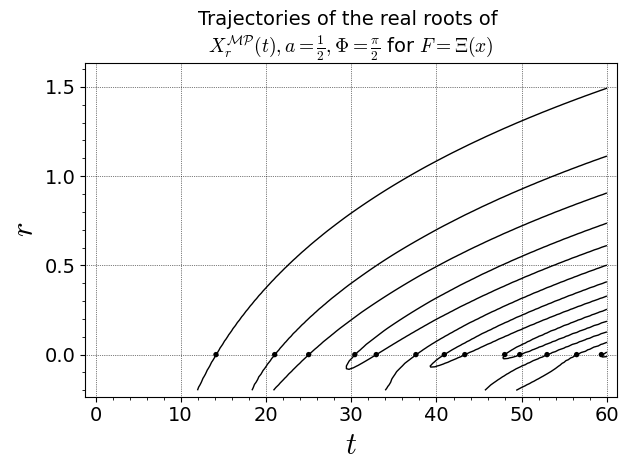

In [4]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixPollCoeffa12dir", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(500):
        g=CCF(-r,0).exp()
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),n) #ensure chosen parameter a is set here
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (MeixPollFlow(x0 + tr/100,tr) - MeixPollFlow(x0,tr))/RDF(tr/100)
        h = MeixPollFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < real_part(tr):
            break
    dzdr = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return ((0.5-I*ordrho[k-1])/2)*prodzeros(k,I) +((0.5+I*ordrho[k-1])/2)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0.5i) = %3.16f (should be equal)." % (CoeffSum, MeixPollFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(MeixPollFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,-0.2,1.6),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0104492672326733 = Xi(0.5i) = 1.0104492672326733 (should be equal).
d/dr z_3(0) via Newton approximation : 19.617263 versus formula: 19.617263 (should be equal).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


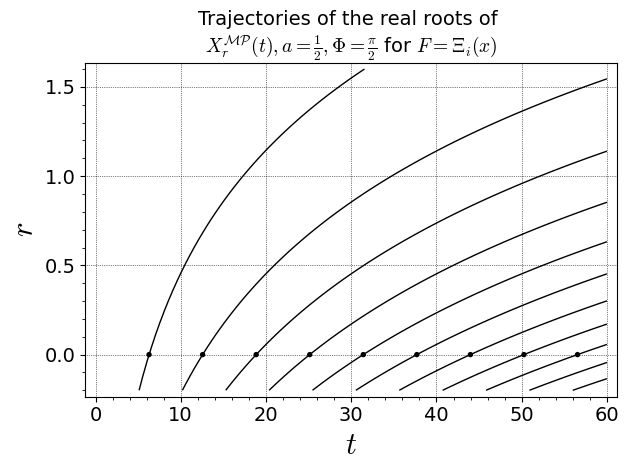

In [3]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixnerPollCoeffa12int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(201):
        g=CCF(-r,0).exp()
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),n) #ensure chose parameter a is set here
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(2*k*pi());
    while(y):
        hd = (MeixPollFlow(x0 + tr/100,tr) - MeixPollFlow(x0,tr))/(tr/100)
        h = MeixPollFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < real_part(tr):
            break
    dzdr = (x1 - RDF(2*pi()*k))/(tr) 
    return dzdr

def B(x,c,d, N):
    return (x+c+1)*(x+c+d+1)*(N-x)/((2*x+c+d+1)*(2*x+c+d+2))

def D(x,c,d, N):
    return x*(x+c+d+N+1)*(x+d)/((2*x+c+d)*(2*x+c+d+1))

#closed form for sum of zeros around k-th zero
def ZS(k,c):
    zk =2*pi()*k
    return (-1)^k*zk*c^4*sin(pi()*k+c/2)/(pi()*k+c/2)    

#compute d/dr zk via formula
def verifyDDE(k):
    return (0.5/2-I*pi()*k)*ZS(k,I) + (0.5/2+I*pi()*k)*ZS(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0.5i) = %3.16f (should be equal)." % (CoeffSum, MeixPollFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(MeixPollFlow(60,0)-Xin(60)))

a1i=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,-0.2,1.6),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$ for $F=\Xi_i(x)$',gridlines=True,plot_points=120)
show(a1i + z1,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1277341571272591536299846126928769581056.0000000000000000 = Xi(100i) = 1033861895674282631393571120657884774400.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 82.635233 versus formula: 82.645284 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000957200 (should show 20 zeros).


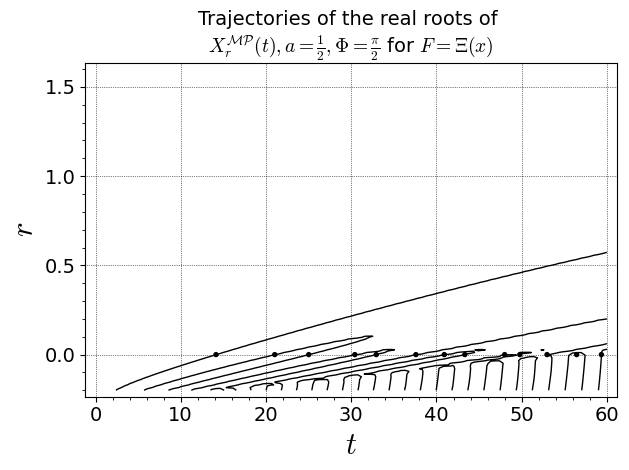

In [4]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixPollCoeffa100dir", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        g=CCF(-r,0).exp()
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("100"),n) #ensure chosen parameter a is set here
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (MeixPollFlow(x0 + tr/100,tr) - MeixPollFlow(x0,tr))/RDF(tr/100)
        h = MeixPollFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < real_part(tr):
            break
    dzdr = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return ((100-I*ordrho[k-1])/2)*prodzeros(k,I) +((100+I*ordrho[k-1])/2)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(100i) = %3.16f (should be equal)." % (CoeffSum, MeixPollFlow(100*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(MeixPollFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,-0.2,1.6),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 4.3135640236812538 = Xi(10i) = 4.3135640236812538 (should be equal).
d/dr z_3(0) via Newton approximation : 28.579113 versus formula: 28.591308 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


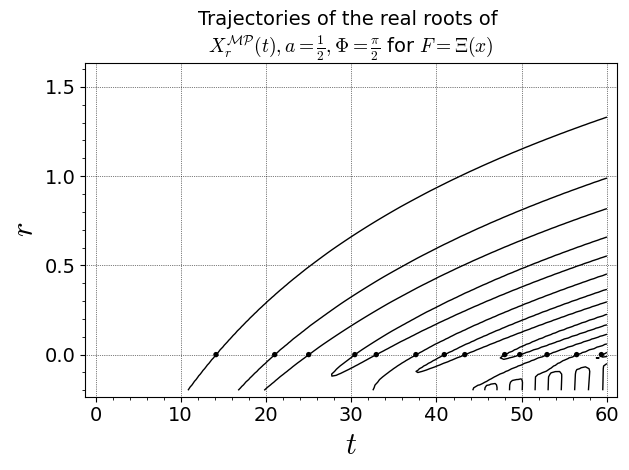

In [7]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixPollCoeffa10dir", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        g=CCF(-r,0).exp()
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("10"),n) #ensure chosen parameter a is set here
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (MeixPollFlow(x0 + tr/100,tr) - MeixPollFlow(x0,tr))/RDF(tr/100)
        h = MeixPollFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < real_part(tr):
            break
    dzdr = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return ((10-I*ordrho[k-1])/2)*prodzeros(k,I) +((10+I*ordrho[k-1])/2)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(10i) = %3.16f (should be equal)." % (CoeffSum, MeixPollFlow(10*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(MeixPollFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,-0.2,1.6),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 2010288.7163655974436551 = Xi(30i) = 2010288.7163655967451632 (should be equal).
d/dr z_3(0) via Newton approximation : 40.611299 versus formula: 40.603303 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


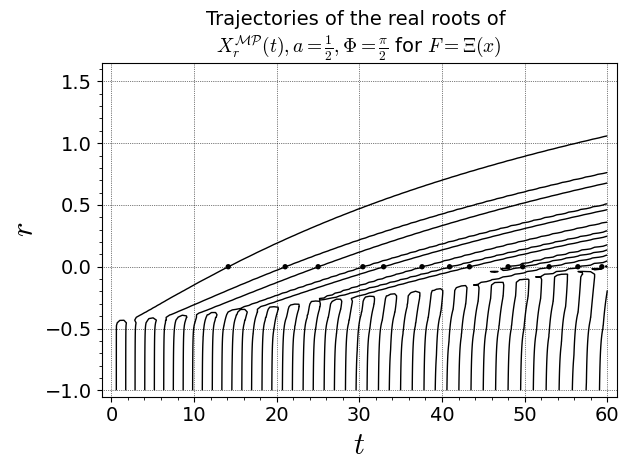

In [10]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixPollCoeffa30dir", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        g=CCF(-r,0).exp()
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("30"),n) #ensure chosen parameter a is set here
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (MeixPollFlow(x0 + tr/100,tr) - MeixPollFlow(x0,tr))/RDF(tr/100)
        h = MeixPollFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < real_part(tr):
            break
    dzdr = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return ((30-I*ordrho[k-1])/2)*prodzeros(k,I) +((30+I*ordrho[k-1])/2)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(30i) = %3.16f (should be equal)." % (CoeffSum, MeixPollFlow(30*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(MeixPollFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,-1,1.6),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 159838164.3373103737831116 = Xi(30i) = 2010288.7163655806798488 (should be equal).
d/dr z_3(0) via Newton approximation : 43.619345 versus formula: 43.606301 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000001 (should show 20 zeros).


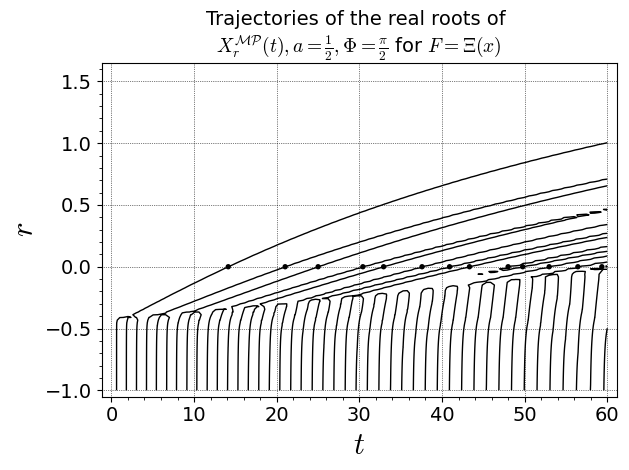

In [12]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixPollCoeffa35dir", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        g=CCF(-r,0).exp()
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("35"),n) #ensure chosen parameter a is set here
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (MeixPollFlow(x0 + tr/100,tr) - MeixPollFlow(x0,tr))/RDF(tr/100)
        h = MeixPollFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < real_part(tr):
            break
    dzdr = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return ((35-I*ordrho[k-1])/2)*prodzeros(k,I) +((35+I*ordrho[k-1])/2)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(30i) = %3.16f (should be equal)." % (CoeffSum, MeixPollFlow(30*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(MeixPollFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,-1,1.6),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

In [14]:
from sage.combinat.q_analogues import q_stirling_number1
q_stirling_number1(4,2)

q^3 + 3*q^2 + 4*q + 3

In [15]:
1+3+4+3

11